In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Heart Disease .csv') 

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()
df8 = df.copy()
df9 = df.copy()
df10 = df.copy()
df11= df.copy()

In [6]:
# Apply Encoding

In [9]:
l=LabelEncoder()

In [10]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype


In [11]:
for col in df3.columns:
    if is_numeric_dtype(df3[col]):
        continue
    df3[col]=l.fit_transform(df3[col])

In [12]:
df3.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [18]:
profile = ProfileReport(df, title = 'Heart Disease',correlations = None, interactions = None, html = {'style':{'full_width' : True}})
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [20]:
df.head().T

,0,1,2,3,4
HeartDisease,No,No,No,No,No
BMI,16.6,20.34,26.58,24.21,23.71
Smoking,Yes,No,Yes,No,No
AlcoholDrinking,No,No,No,No,No
Stroke,No,Yes,No,No,No
PhysicalHealth,3,0,20,0,28
MentalHealth,30,0,30,0,0
DiffWalking,No,No,No,No,Yes
Sex,Female,Female,Male,Female,Female
AgeCategory,55-59,80 or older,65-69,75-79,40-44


In [31]:
x = df3.drop('HeartDisease', axis=1)

In [32]:
y = df3['HeartDisease']

Train = 70%, Test = 30%

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# train = 70%
# test = 30%
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30, random_state=42) # train_size=.70

In [35]:
xtrain.shape

(223856, 17)

In [37]:
df3.shape

(319795, 18)

In [38]:
xtest.shape

(95939, 17)

Appying Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
clf = DecisionTreeClassifier()

In [41]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [42]:
pred = clf.predict(xtest) # predicted y for testing val
pred

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
len(pred)

95939

In [44]:
import numpy as np
np.array(ytest) # actual ytest

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, plot_roc_curve

In [46]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     87649
           1       0.23      0.25      0.24      8290

    accuracy                           0.86     95939
   macro avg       0.58      0.59      0.58     95939
weighted avg       0.87      0.86      0.87     95939



In [47]:
cm = confusion_matrix(ytest, pred)

In [48]:
cm

array([[80741,  6908],
       [ 6208,  2082]], dtype=int64)

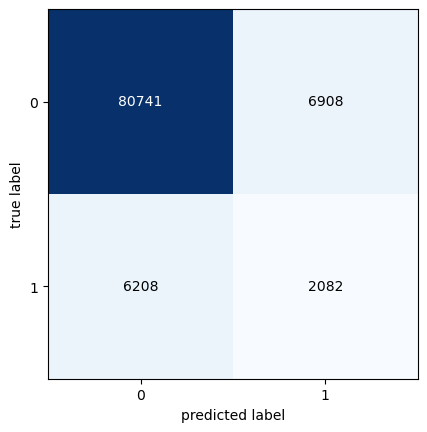

In [54]:

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array([[80741, 6908],
                    [6208, 2082]])

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

ROC cruve

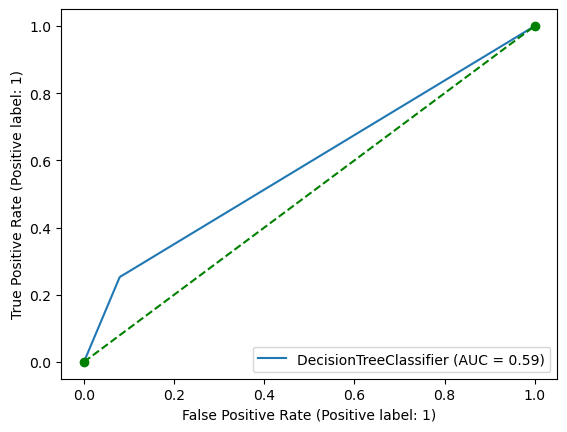

In [56]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1],'go--')